
# Analisis Korelasi dalam Menentukan Pola Hubungan Kasus Covid-19 dengan Tingkat Mobilitas Penduduk Jakarta Pada Tahun 2020

**Analisis Masalah**
1. Apakah terdapat pengaruh kebijakan pembatasan mobilitas oleh pemerintah dalam kebijakan social distancing dengan tingkat covid-19 pada tahun 2020?
2. Bagaimana kondisi tingkat covid-19 pada masa awal dan masa social distancing?

# Datasets and Modules

**Import module yang akan digunakan**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime
import scipy.stats as stats

**Import data Covid-19 DKI Jakarta**

In [ ]:
df_covid = pd.read_csv('/content/Daily Update Data Agregat Covid-19 Jakarta - Data Jakarta.csv')
df_covid

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,01/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,02/03/2020,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,03/03/2020,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,04/03/2020,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,05/03/2020,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,26/06/2023,NaN,NaN,16115,1551828,124,67,1568134,10,191,25,0.0,2.0,189.0
1213,27/06/2023,NaN,NaN,16115,1551845,126,67,1568153,19,193,17,0.0,10.0,183.0
1214,28/06/2023,NaN,NaN,16115,1551857,129,63,1568164,11,192,12,0.0,10.0,182.0
1215,29/06/2023,NaN,NaN,16115,1551896,117,44,1568172,8,161,39,0.0,8.0,153.0


In [ ]:
#Mengubah jenis data variabel dan drop kolom yang tidak akan digunakan
df_covid['Tanggal'] = pd.to_datetime(df_covid['Tanggal'])

df_covid['Tanggal'] = df_covid['Tanggal'].dt.strftime('%d-%m-%Y')
df_covid['Tanggal'] = pd.to_datetime(df_covid['Tanggal'])

df_covid.drop(df_covid.columns[[1,2,3,11,12,13]], axis = 1, inplace = True)
df_covid

<ipython-input-17-09cd3a75ccb4>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_covid['Tanggal'] = pd.to_datetime(df_covid['Tanggal'])


,Tanggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
0,2020-03-01,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0
2,2020-03-03,0,0,2,3,3,2,0
3,2020-03-04,0,0,2,3,0,2,0
4,2020-03-05,0,0,4,7,4,4,0
...,...,...,...,...,...,...,...,...
1212,2023-06-26,1551828,124,67,1568134,10,191,25
1213,2023-06-27,1551845,126,67,1568153,19,193,17
1214,2023-06-28,1551857,129,63,1568164,11,192,12
1215,2023-06-29,1551896,117,44,1568172,8,161,39


**Import data mobilitas DKI Jakarta tahun 2021**

In [ ]:
df_mobilitas = pd.read_csv('/content/2020_ID_Region_Mobility_Report.csv')
df_mobilitas

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-15,-2.0,-2.0,-8.0,1.0,5,1
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-16,-3.0,-3.0,-7.0,-4.0,2,2
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-17,-3.0,-4.0,-7.0,-1.0,3,1
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-18,-3.0,-2.0,-4.0,1.0,2,1
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-19,-3.0,-4.0,-3.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2020-12-27,4.0,28.0,29.0,-8.0,-2,4
11231,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2020-12-28,2.0,25.0,32.0,-3.0,-30,9
11232,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2020-12-29,1.0,26.0,32.0,2.0,-30,8
11233,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2020-12-30,11.0,38.0,53.0,5.0,-28,8


In [ ]:
df_mobilitas.query('sub_region_1 == "Jakarta"', inplace = True)
df_mobilitas

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4173,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-15,2.0,3.0,16.0,5.0,6,0
4174,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
4175,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
4176,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-18,-1.0,1.0,-3.0,3.0,3,1
4177,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-19,-1.0,-3.0,-2.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-12-27,-36.0,-17.0,-53.0,-33.0,-11,8
4490,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-12-28,-28.0,-6.0,-48.0,-40.0,-36,13
4491,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-12-29,-29.0,-8.0,-49.0,-40.0,-38,14
4492,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-12-30,-28.0,-4.0,-50.0,-38.0,-38,13


In [ ]:
df_mobilitas['date'] = pd.to_datetime(df_mobilitas['date'])

df_mobilitas['tanggal'] = df_mobilitas['date'].dt.strftime('%d-%m-%Y')
df_mobilitas['tanggal'] = pd.to_datetime(df_mobilitas['tanggal'])

df_mobilitas.drop(df_mobilitas.columns[[1,3,4,5,6,7,8]], axis = 1, inplace = True)
df_mobilitas

<ipython-input-20-cc6db5d5fb5e>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_mobilitas['tanggal'] = pd.to_datetime(df_mobilitas['tanggal'])


,country_region_code,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,tanggal
4173,ID,Jakarta,2.0,3.0,16.0,5.0,6,0,2020-02-15
4174,ID,Jakarta,-10.0,-10.0,-15.0,-3.0,2,2,2020-02-16
4175,ID,Jakarta,-2.0,-1.0,-6.0,2.0,4,1,2020-02-17
4176,ID,Jakarta,-1.0,1.0,-3.0,3.0,3,1,2020-02-18
4177,ID,Jakarta,-1.0,-3.0,-2.0,3.0,3,1,2020-02-19
...,...,...,...,...,...,...,...,...,...
4489,ID,Jakarta,-36.0,-17.0,-53.0,-33.0,-11,8,2020-12-27
4490,ID,Jakarta,-28.0,-6.0,-48.0,-40.0,-36,13,2020-12-28
4491,ID,Jakarta,-29.0,-8.0,-49.0,-40.0,-38,14,2020-12-29
4492,ID,Jakarta,-28.0,-4.0,-50.0,-38.0,-38,13,2020-12-30


In [ ]:
df_mobilitas = df_mobilitas.astype({"retail_and_recreation_percent_change_from_baseline":"int","grocery_and_pharmacy_percent_change_from_baseline":"int","parks_percent_change_from_baseline":"int","transit_stations_percent_change_from_baseline":"int"})

# Exploratory Data Analysis










**Pre-processing**

In [ ]:
#untuk melihat apakah terdapat missing value
df_covid.isnull().all()

Tanggal            False
Sembuh             False
Self Isolation     False
Masih Perawatan    False
Total Pasien       False
Positif Harian     False
Positif Aktif      False
Sembuh Harian      False
dtype: bool

In [ ]:
df_mobilitas.isnull().all()

country_region_code                                   False
sub_region_1                                          False
retail_and_recreation_percent_change_from_baseline    False
grocery_and_pharmacy_percent_change_from_baseline     False
parks_percent_change_from_baseline                    False
transit_stations_percent_change_from_baseline         False
workplaces_percent_change_from_baseline               False
residential_percent_change_from_baseline              False
tanggal                                               False
dtype: bool

Pada kedua hasil diatas, diketahui bahwa tidak terdapat data kosong pada data covid maupun data mobilitas

**Statistika Deskriptif**

* Data Covid-19 DKI Jakarta

In [ ]:
df_covid.describe()

,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
count,1.217000e+03,1217.000000,1217.000000,1.217000e+03,1217.000000,1217.000000,1217.000000
mean,7.878787e+05,8337.393591,2549.302383,8.088383e+05,1288.666393,10886.712408,1275.285949
std,5.759436e+05,13253.205670,4203.942467,5.808345e+05,2187.176647,16950.004382,2364.124603
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-162.000000
25%,1.629110e+05,1173.000000,287.000000,1.817130e+05,128.000000,1593.000000,121.000000
50%,8.469420e+05,4142.000000,1081.000000,8.614270e+05,600.000000,6340.000000,584.000000
75%,1.363254e+06,9078.000000,3067.000000,1.393909e+06,1403.000000,12440.000000,1310.000000
max,1.551920e+06,88295.000000,30418.000000,1.568183e+06,15825.000000,113138.000000,20570.000000


In [ ]:
df_covid.loc[df_covid['Positif Harian'] == 15825]

,Tanggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
707,2022-02-06,899957,52594,14625,980970,15825,67219,8386


Pada data diatas, ditunjukkan bahwa kasus positif harian mencapai angka tertinggi pada angka 15.825 kasus di tanggal 6 Februari 2022

In [ ]:
df_covid.loc[df_covid['Positif Aktif'] == 113138]

,Tanggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian
502,2021-07-16,604033,88295,24843,727016,12415,113138,8451


Data diatas menunjukkan bahwa kasus positif aktif tertinggi ada pada tanggal 16 Juli 2021 yaitu sebanyak 113138

<Axes: xlabel='Positif Harian'>

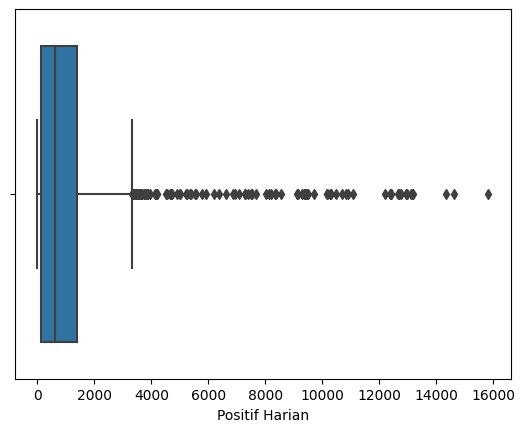

In [ ]:
sns.boxplot(x = df_covid['Positif Harian'])

Boxplot diatas menujukkan adanya outliers pada data yang berarti terdapat jumlah kasus positif harian yang lebih tinggi dibanding biasanya.

**Grafik Kasus Positif Harian Covid-19 dan Kasus Sembuh Harian di Jakarta**

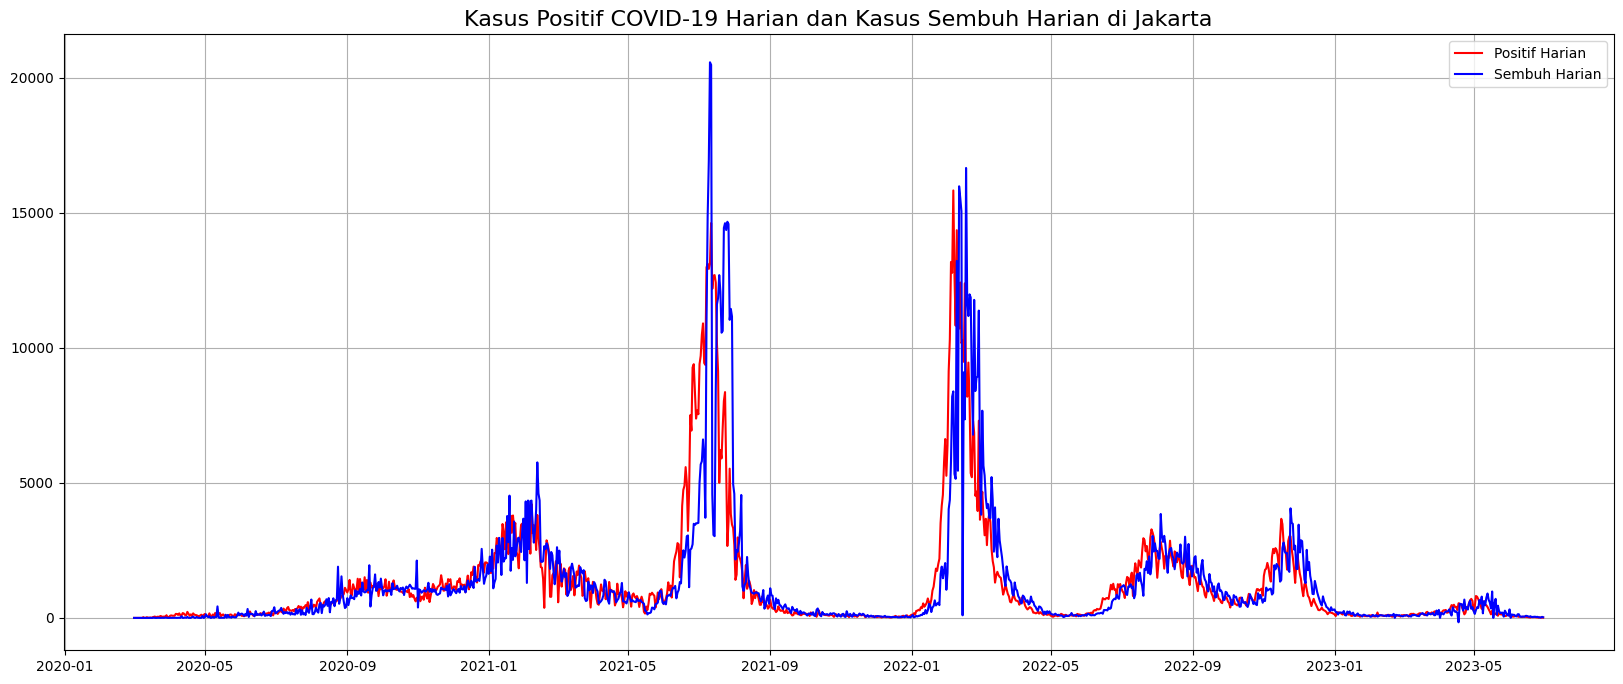

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_covid['Tanggal'], df_covid['Positif Harian'], 'r',label='Positif Harian')
x.plot(df_covid['Tanggal'], df_covid['Sembuh Harian'], 'b',label='Sembuh Harian')
plt.title('Kasus Positif COVID-19 Harian dan Kasus Sembuh Harian di Jakarta', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

**Grafik Kasus Positif Harian Covid-19 di Jakarta Pada Tahun 2020**

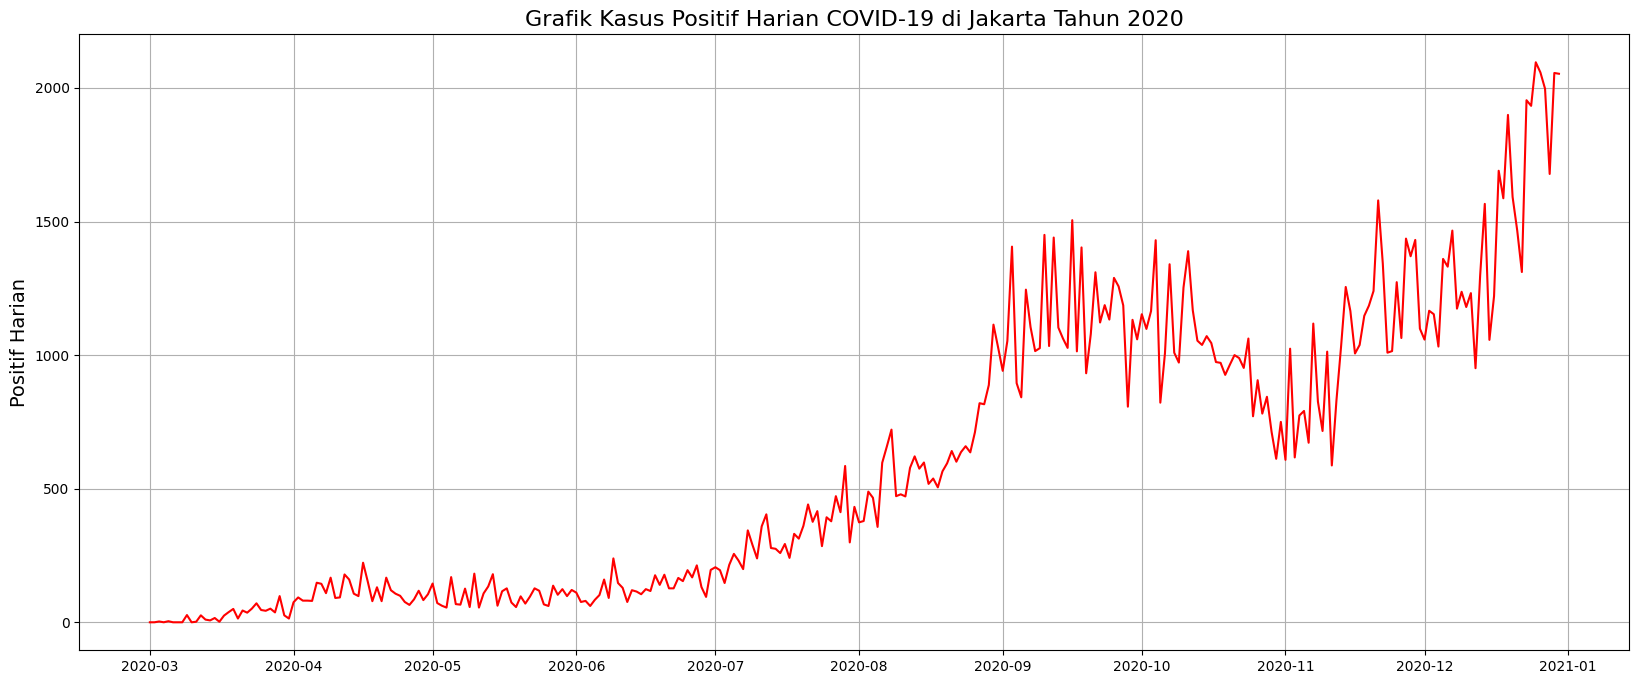

In [ ]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_covid['Tanggal'][0:305], df_covid['Positif Harian'][0:305], 'r')
plt.title('Grafik Kasus Positif Harian COVID-19 di Jakarta Tahun 2020', fontsize=16)
plt.ylabel('Positif Harian', fontsize=14)
plt.grid(True)
plt.show()

Data menunjukkan bahwa kasus Covid-19 mulai muncul dan tumbuh pada Maret 2020 yang menandakan masa awal Covid-19 di Indonesia.

Pada 2020 Warga Indonesia telah mengalami 3 fase dalam peristiwa penyebaran virus Covid-19 ini, yaitu:
1. Masa Awal
Masa ini ditandai dengan munculnya kasus awal covid-19 pada Indonesia yaitu pada tanggal 3 Maret 2020 hingga 16 Maret 2020.
2. Masa Social Distancing
Masa ini ditandai dengan munculnya kebijakan pengendalian penyebaran COVID-19 yang berlaku mulai 17 Maret 2020. Kebijakan ini mewajibkan penutupan sekolah, fasilitas umum seperti pusat perbelanjaan,  dan  area  publik  lain  yang  diduga  potensial  untuk  tempat  berkumpulnya masyarakat.
3. Masa New Normal
Masa ini dimulai dari 5 Juni 2020 yang ditandai dengan kebijakan  pelonggaran  batasan  sosial  dan  mobiltas  penduduk.

Kebijakan yang telah diterapkan akan berdampak pada tingkat mobilitas masyarakat. Kemudian akan dicari lebih lanjut apakah terdapat pola hubungan antara perubahan tingkat mobilitas akibat kebijakan social distancing dengan tingkat kasus positif harian covid-19.

**Grafik Data Mobilitas dan Data Positif Harian Serta Sembuh Harian Covid-19 Jakarta Tahun 2020**

In [ ]:


df_covid = df_covid.drop([31,32,61,62,92,93],)#drop data pada tanggal 1 dan 2 karena data mobilitas jakarta diukur mulai tanggal 3 perbulannya
#mengambil sample data pada bulan maret hingga juni 2020
df_covid1 = df_covid[(df_covid['Tanggal'] <= '2020-06-30') & (df_covid['Tanggal'] >= '2020-03-17')]

df_mobilitas1 = df_mobilitas[(df_mobilitas['tanggal'] <= '2020-06-30') & (df_mobilitas['tanggal'] >= '2020-03-17')]

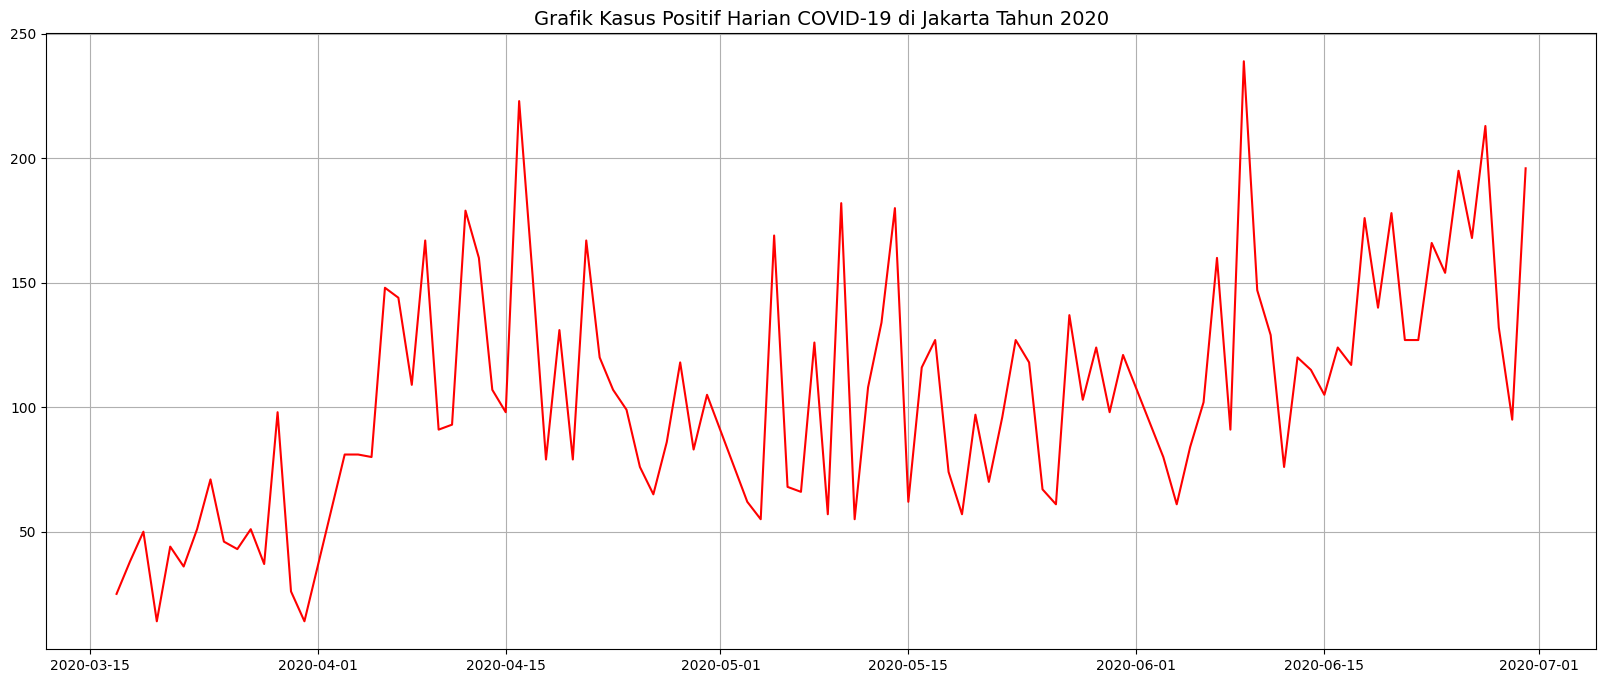

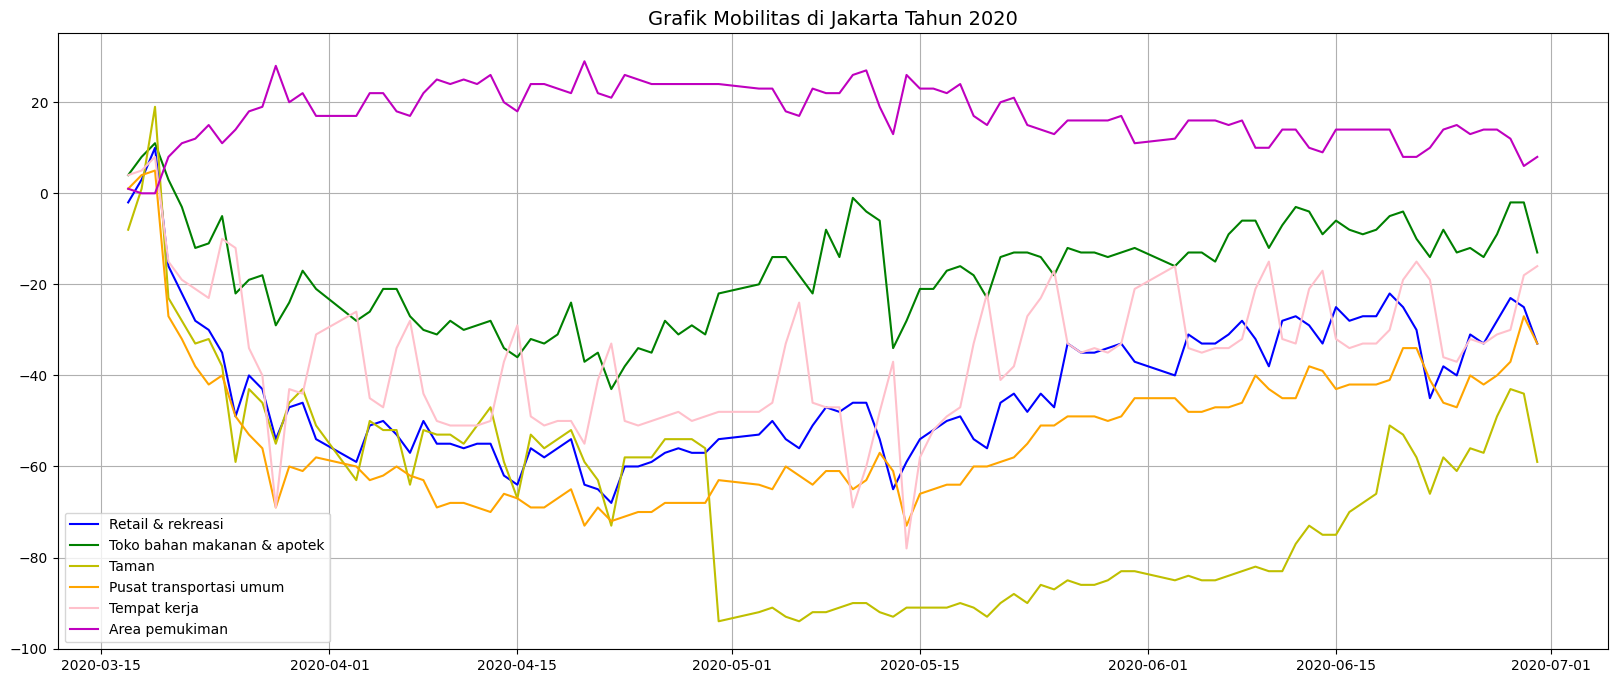

In [ ]:
#df_covid = df_covid.drop([31,32,61,62,92,93])#drop data pada tanggal 1 dan 2 karena data mobilitas jakarta diukur mulai tanggal 3 perbulannya
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_covid1['Tanggal'], df_covid1["Positif Harian"], 'r')
plt.title('Grafik Kasus Positif Harian COVID-19 di Jakarta Tahun 2020', fontsize=14)
plt.grid(True)
plt.show()
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,8))
x.plot(df_covid1['Tanggal'], df_mobilitas1['retail_and_recreation_percent_change_from_baseline'], 'b',label="Retail & rekreasi")
x.plot(df_covid1['Tanggal'], df_mobilitas1['grocery_and_pharmacy_percent_change_from_baseline'], 'g',label="Toko bahan makanan & apotek")
x.plot(df_covid1['Tanggal'], df_mobilitas1['parks_percent_change_from_baseline'], 'y',label="Taman")
x.plot(df_covid1['Tanggal'], df_mobilitas1['transit_stations_percent_change_from_baseline'], 'orange',label="Pusat transportasi umum")
x.plot(df_covid1['Tanggal'], df_mobilitas1['workplaces_percent_change_from_baseline'], 'pink',label="Tempat kerja")
x.plot(df_covid1['Tanggal'], df_mobilitas1['residential_percent_change_from_baseline'], 'm',label="Area pemukiman")
plt.title('Grafik Mobilitas di Jakarta Tahun 2020', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Dapat terlihat dari grafik mobilitas bahwa rata-rata menurun pada bulan Mei 2020, dimana kebijakan social distancing yang pembatasan sosial berskala besar melalui Peraturan Gubernur DKI Jakarta Nomor 33 Tahun 2020 telah diberlakukan. Kebijakan Pembatasan Sosial Berskala Besar ini cukup menekan tingkat mobilitas di Jakarta.

# Modelling

Setelah dilakukan EDA pada kedua data, kami melihat pola yang menujukkan adanya hubungan pada tingkat mobilitas dengan kasus Covid-19 di Jakarta pada masa diberlakukannya kebijakan Pembatasan Sosial Berskala Besar.

Oleh karena itu, untuk mengetahui hubungan keduanya secara akurat akan dilakukan perhitungan secara statistik melalui analisis korelasi antara jumlah kasus positif harian Jakarta dengan tingkat mobilitas Jakarta pada masa awal Covid-19 hingga masa diberlakukannya kebijakan Pembatasan Sosial Berskala Besar.

**Hipotesis**

H0 : Tidak ada korelasi yang kuat antara tingkat mobilitas dengan kasus Covid-19 di Jakarta pada masa awal Covid-19 hingga masa diberlakukannya kebijakan Pembatasan Sosial Berskala Besar (3 Maret 2020 - 31 Juni 2020).

H1 : Terdapat korelasi yang kuat antara tingkat mobilitas dengan kasus Covid-19 di Jakarta pada masa awal Covid-19 hingga masa diberlakukannya kebijakan Pembatasan Sosial Berskala Besar (3 Maret 2020 - 31 Juni 2020).

In [ ]:
k1 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['retail_and_recreation_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Retail dan Rekreasi adalah", k1[0])

k2 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['grocery_and_pharmacy_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Toko Bahan Makanan dan Apotek adalah",k2[0])

k3 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['parks_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Taman adalah",k3[0])

k4 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['transit_stations_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah",k4[0])

k5 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['workplaces_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Tempat Kerja adalah",k5[0])

k6 = stats.spearmanr(df_covid1['Positif Harian'], df_mobilitas1['residential_percent_change_from_baseline'])
print("Korelasi Positif Harian Jakarta dengan Mobilitas Area Pemukiman adalah",k6[0])

Korelasi Positif Harian Jakarta dengan Mobilitas Retail dan Rekreasi adalah -0.04664049232525634
Korelasi Positif Harian Jakarta dengan Mobilitas Toko Bahan Makanan dan Apotek adalah -0.011299677376649508
Korelasi Positif Harian Jakarta dengan Mobilitas Taman adalah -0.12702446545194293
Korelasi Positif Harian Jakarta dengan Mobilitas Pusat Transportasi Umum adalah -0.013962331178974746
Korelasi Positif Harian Jakarta dengan Mobilitas Tempat Kerja adalah -0.07323222303897099
Korelasi Positif Harian Jakarta dengan Mobilitas Area Pemukiman adalah -0.051663042566333514


Korelasi tingkat positif harian dengan tingkat mobilitas retail dan rekreasi, toko bahan makanan dan apotek, taman, transportasi, tempat kerja, dan area pemukiman ternyata seluruhnya ada pada angka dibawah 0,25 sehingga tidak bisa dikatakan cukup kuat ataupun kuat korelasinya.
Hal ini ditunjukkan dengan kondisi tingkat covid-19 yang nyatanya masih terus melunjak hingga tahun 2021.

# Conclusion & Recommendation

**Conclusion**

Terdapat beberapa kesimpulan yang dapat diperoleh setelah mengolah keduandata diatas, yaitu:

1. Peristiwa Covid-19 pada Indonesia muncul pada tanggal 3 Maret 2020 dimana pada tanggal ini ditandai sebagai masa awal pandemi.
2. Jumlah kasus positif harian Covid-19 terus meningkat hingga pada puncaknya yaitu pada 6 Februari 2021.
3. Pada 10 April 2020 ditetapkan kebijakan Pembatasan Sosial Berskala Besar (PSBB) Peraturan Gubernur DKI Jakarta Nomor 33 Tahun 2020 yang mengakibatkan penekanan tingkat mobilitas Jakarta.
4. Jumlah kasus positif harian Covid-19 dengan Tingkat mobilitas Jakarta pada masa awal pemberlakuan Pembatasan Sosial Berskala Besar (PSBB) ternyata tidak memiliki hubungan yang cukup kuat, sehingga saat itu tingkat mobilitas yang berkurang masih belum mampu mengurangi jumlah positif harian Covid-19 di Jakarta.   

**Recommendation**

Setelah mengolah data yang telah berlalu yaitu tahun 2020, dapat diperoleh beberapa rekomendasi yang bisa digunakan kembali sebagai referensi/panduan jika nantinya peristiwa pandemi ini naik kembali, yaitu:

1. Pemerintah perlu mendalami lebih jauh apa saja yang bisa menjadi faktor peningkatan kasus penyebaran virus yang terjadi.
2. Pemberlakuan Pembatasan Sosial Berskala Besar (PSBB) ternyata dapat memberikan dampak baik, tetapi jika tak menekankannya pada rakyat maka tak akan memberikan dampak yang terlalu besar pada penurun tingkat kasus positif covid-19.
3. Aspek pembatasan beraktifitas bukan satu-satunya aspek yang dapat menurukan tingkat kasus positif harian, sehingga diperlukan kebijaka-kebijakan lain yang tepat agar nantinya kasus positif harian dapat menurun dan mereda.

# Bibliography

* Retaduari, E. A. (2022, March 2). 2 Maret 2020, Saat Indonesia Pertama Kali Dilanda Covid-19. KOMPAS.Com; Kompas.com. https://nasional.kompas.com/read/2022/03/02/10573841/2-maret-2020-saat-indonesia-pertama-kali-dilanda-covid-19
Nugroho, R. S. (2021, June 13). Kasus Covid-19 Melonjak, Ini Penyebab dan
* Daerah dengan Kasus Tinggi Halaman all - Kompas.com. KOMPAS.Com; Kompas.com. https://www.kompas.com/tren/read/2021/06/13/143000165/kasus-covid-19-melonjak-ini-penyebab-dan-daerah-dengan-kasus-tinggi?page=all
* Tim detikcom. (2023, February 23). Apakah Masih Wajib Pakai Masker? Simak Pernyataan Terbaru Jokowi. Detiknews; Detik. https://news.detik.com/berita/d-6584683/apakah-masih-wajib-pakai-masker-simak-pernyataan-terbaru-jokowi
* Tim detikcom. (2022, January 28). Grafik Lonjakan Kasus Corona RI di Bulan Januari. Detiknews; Detik. https://news.detik.com/infografis/d-5918449/grafik-lonjakan-kasus-corona-ri-di-bulan-januari
* Kominfo. (n.d.). Kementerian Komunikasi dan Informatika. Website Resmi Kementerian Komunikasi Dan Informatika RI. Retrieved July 14, 2023, from https://www.kominfo.go.id/content/detail/32189/usulan-psbb-bisa-jadi-solusi-covid-19-permenkes-no-9-atur-tata-caranya/0/artikel_gpr
